# **Árvores de Decisão**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o possivél nivél de cancer de pulmão com base em alguns fatores clínicos e laboratoriais. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('/content/drive/MyDrive/UP/cancer patient data sets.csv',
                    sep=',', encoding='utf-8')

In [20]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## **Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**

In [19]:
df2 = pd.DataFrame.copy(df)

In [21]:
df2.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [22]:
df2['Level'].replace({'Low':0, 'Medium': 1, 'High': 2}, inplace=True)
df2.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                        int64
dtype: object

## **Dropando coluna 'Patient ID'**

In [24]:
df2 = df2.drop(columns=['Patient Id'])
df2.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


## **ATRIBUTOS PREVISORES E ALVO**

In [25]:
df2.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [26]:
previsores = df2.iloc[:, 0:24].values
previsores

array([[  0,  33,   1, ...,   2,   3,   4],
       [  1,  17,   1, ...,   1,   7,   2],
       [  2,  35,   1, ...,   6,   7,   2],
       ...,
       [997,  25,   2, ...,   6,   7,   2],
       [998,  18,   2, ...,   4,   2,   3],
       [999,  47,   1, ...,   6,   7,   2]])

In [27]:
previsores.shape

(1000, 24)

In [28]:
alvo = df2.iloc[:, 24].values
alvo

array([0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
alvo.shape

(1000,)

## **Análise das escalas dos atributos (Escalonamento)**

Padronização (utiliza a média e o desvio padrão como referência).

In [30]:
df2.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [33]:
previsores_esc

array([[-1.73031962, -0.34784816, -0.81990292, ..., -0.83861787,
        -0.41855027,  0.72865507],
       [-1.72685552, -1.68123833, -0.81990292, ..., -1.38459305,
         1.54417079, -0.6282445 ],
       [-1.72339142, -0.18117439, -0.81990292, ...,  1.34528283,
         1.54417079, -0.6282445 ],
       ...,
       [ 1.72339142, -1.01454325,  1.21965659, ...,  1.34528283,
         1.54417079, -0.6282445 ],
       [ 1.72685552, -1.59790145,  1.21965659, ...,  0.25333248,
        -0.90923053,  0.05020528],
       [ 1.73031962,  0.81886824, -0.81990292, ...,  1.34528283,
         1.54417079, -0.6282445 ]])

In [34]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.730320,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,...,-0.353971,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655
1,-1.726856,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,...,-0.766045,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245
2,-1.723391,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,...,1.294323,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245
3,-1.719927,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,...,1.294323,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105
4,-1.716463,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,...,1.706397,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.568858,-0.819903,1.064362,0.930449,0.926842,1.025275,1.138323,0.876816,1.175473,...,0.882250,0.509919,-0.387677,-0.980760,1.579206,1.874630,-0.805663,0.253332,0.562810,0.050205
996,1.719927,-0.014501,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,...,0.882250,2.292852,0.972594,0.332758,1.579206,-0.769418,0.032260,-0.292643,-1.399911,0.728655
997,1.723391,-1.014543,1.219657,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,...,1.294323,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245
998,1.726856,-1.597901,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,...,1.706397,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205


## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir.

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

## **BASE DE TREINO E TESTE**

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [37]:
x_treino.shape

(700, 24)

In [38]:
x_teste.shape

(300, 24)

In [39]:
y_treino.shape

(700,)

In [40]:
y_teste.shape

(300,)

# **ÁRVORE DE DECISÃO**

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [42]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
#arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5555555555555556, 0.875, 'X[14] <= 0.264\nentropy = 1.578\nsamples = 700\nvalue = [204, 239, 257]'),
 Text(0.3333333333333333, 0.625, 'X[18] <= 0.354\nentropy = 1.094\nsamples = 407\nvalue = [191, 210, 6]'),
 Text(0.2222222222222222, 0.375, 'X[15] <= -0.159\nentropy = 0.872\nsamples = 245\nvalue = [191, 48, 6]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.207\nsamples = 184\nvalue = [178, 6, 0]'),
 Text(0.3333333333333333, 0.125, 'entropy = 1.175\nsamples = 61\nvalue = [13, 42, 6]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 162\nvalue = [0, 162, 0]'),
 Text(0.7777777777777778, 0.625, 'X[6] <= 1.263\nentropy = 0.721\nsamples = 293\nvalue = [13, 29, 251]'),
 Text(0.6666666666666666, 0.375, 'X[10] <= -0.925\nentropy = 0.449\nsamples = 271\nvalue = [13, 7, 251]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.18\nsamples = 258\nvalue = [0, 7, 251]'),
 Text(0.8888888888888888, 0

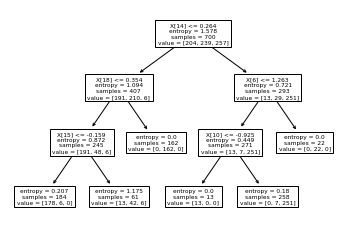

In [43]:
tree.plot_tree(_arvore)

In [44]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1,
       0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2,
       2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0,
       2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 2])

In [45]:
y_teste

array([2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2])

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 94.00%


In [48]:
confusion_matrix(y_teste, previsoes_arvore)

array([[ 92,   7,   0],
       [  4,  86,   3],
       [  0,   4, 104]])

In [49]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        99
           1       0.89      0.92      0.91        93
           2       0.97      0.96      0.97       108

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Análise dados de treino**

In [50]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2,
       0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2,

In [51]:
accuracy_score(y_treino, previsoes_treino)

0.9542857142857143

In [52]:
confusion_matrix(y_treino, previsoes_treino)

array([[191,  13,   0],
       [  6, 226,   7],
       [  0,   6, 251]])

Árvore de Decisão: 94.00%

# **RANDOM FOREST**

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [55]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2])

In [56]:
y_teste

array([2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2])

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 100.00%


In [59]:
confusion_matrix(y_teste, previsoes_random)

array([[ 99,   0,   0],
       [  0,  93,   0],
       [  0,   0, 108]])

In [60]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00       108

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [61]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1,
       2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 2,
       1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2,

In [62]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [63]:
confusion_matrix(y_treino, previsoes_treino)

array([[204,   0,   0],
       [  0, 239,   0],
       [  0,   0, 257]])

Radom Forest: 100.00%

# **REGRESSÃO LOGÍSTICA**

In [64]:
from sklearn.linear_model import LogisticRegression

In [68]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l1", tol=0.0001, C=2, solver='liblinear')
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=500, penalty='l1', random_state=1,
                   solver='liblinear')

In [69]:
logistica.intercept_

array([-5.32616298, -5.3767057 , -4.30052097])

In [70]:
logistica.coef_

array([[ 0.00000000e+00, -1.16816349e+00,  2.44353812e-01,
         0.00000000e+00,  0.00000000e+00, -9.44144233e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.48418213e+00,  0.00000000e+00,
        -1.85410118e+00,  0.00000000e+00, -1.98623070e+00,
        -4.88759480e-01,  0.00000000e+00,  0.00000000e+00,
        -3.83426073e+00, -1.22404551e+00, -2.37864884e+00,
        -6.15525616e-01, -1.22997230e+00, -2.24576132e+00],
       [ 0.00000000e+00,  2.59034090e+00, -1.50605002e-02,
        -8.71283539e+00, -6.19118859e+00,  1.79199873e+01,
        -1.09554638e+01,  4.25746075e+00,  6.84956081e+00,
        -1.65717751e+00,  2.44251282e+00,  4.04637915e+00,
        -3.98098766e+00, -2.67582536e+00, -1.78814500e-01,
        -3.78507189e+00,  1.00798219e+00,  3.02187526e-01,
         3.29733494e+00, -1.28075105e+00,  2.77277850e+00,
         1.31857310e+00, -4.18963829e-01,  4.95935210e+00],
       [ 0.00000000e+00, -2.33084098e-01,  1.56946573e

In [71]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2])

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 99.67%


In [74]:
confusion_matrix(y_teste, previsoes_logistica)

array([[ 98,   1,   0],
       [  0,  93,   0],
       [  0,   0, 108]])

In [75]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       0.99      1.00      0.99        93
           2       1.00      1.00      1.00       108

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



**Análise dados de treino**

In [76]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1,
       2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 2,
       1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2,

In [77]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [78]:
confusion_matrix(y_treino, previsoes_treino)

array([[204,   0,   0],
       [  0, 239,   0],
       [  0,   0, 257]])

Regressão Logística = 85,87%